In [1]:
import pandas as pd
data_30_sentences = pd.read_csv(r'C:\Users\erich\Desktop\DS_project\data\data_30_sentences.csv')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()

def clean_data(df):
    df = df[df['HTML_Content'].isin(['Explicit', 'General Audiences', 'Mature', 'Not Rated', 'Teen And Up Audiences'])]

    df = df.dropna(subset=['TXT_Content'])

    def clean_text(text):

        if not isinstance(text, str):
            text = str(text)

        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        tokenized_text = word_tokenize(text)
        cleaned_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in set(stopwords.words('english'))]

        return ' '.join(cleaned_text)

    df['TXT_Content'] = df['TXT_Content'].apply(clean_text)

    return df

data_30_sentences = clean_data(data_30_sentences)

print(data_30_sentences)

               HTML_Content                                        TXT_Content
0     Teen And Up Audiences  huckleberry finn stood front old wooden door m...
1     Teen And Up Audiences  right huck trying figure every sort way could ...
2         General Audiences  three buried mother christmas eve thing huck c...
3     Teen And Up Audiences  air hot brow wet mind exhausted st petersburg ...
4         General Audiences  episode genre al chaos chaos space time vortex...
...                     ...                                                ...
5993  Teen And Up Audiences  seen news pat asked robin chance hang coat mor...
5994  Teen And Up Audiences  free next friday night murphy smiled phone rob...
5995                 Mature  turned walked away wan na say come baby give w...
5996      General Audiences  perfect word tended apply liberally one often ...
5997                 Mature  heaven fact unlike earth pro con pro include t...

[5998 rows x 2 columns]


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ..........................alpha=0.0, fit_prior=True; total time=   0.2s


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ..........................alpha=0.0, fit_prior=True; total time=   0.1s


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ..........................alpha=0.0, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.0, fit_prior=True; total time=   0.1s


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ..........................alpha=0.0, fit_prior=True; total time=   0.1s
[CV] END .........................alpha=0.0, fit_prior=False; total time=   0.1s


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END .........................alpha=0.0, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.0, fit_prior=False; total time=   0.1s


C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END .........................alpha=0.0, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.0, fit_prior=False; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END .........................alpha=0.5, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.5, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.5, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.5, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.5, fit_prior=False; total time=   0.1s
[CV] END ...................

C:\Users\erich\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


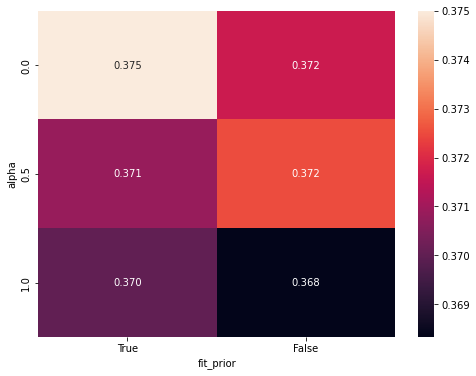

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_30_sentences['TXT_Content'])
y = data_30_sentences['HTML_Content']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

mnb = MultinomialNB()

param_grid = {'alpha': [0.0, 0.5, 1.0], 'fit_prior': [True, False]}

grid = GridSearchCV(mnb, param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_val.toarray(), y_val)

print(grid.best_params_)

scores = grid.cv_results_['mean_test_score'].reshape(len(param_grid['alpha']), len(param_grid['fit_prior']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['fit_prior'], yticklabels=param_grid['alpha'])
plt.xlabel('fit_prior')
plt.ylabel('alpha')
plt.show()


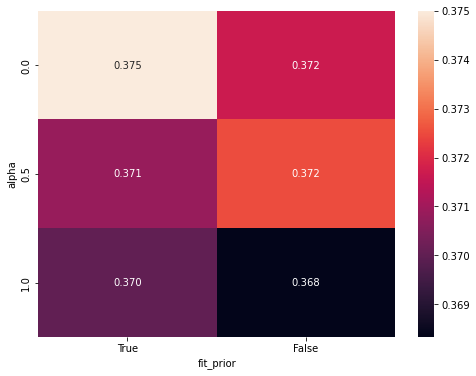

In [3]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['fit_prior'], yticklabels=param_grid['alpha'])
plt.xlabel('fit_prior')
plt.ylabel('alpha')
plt.savefig('C:/Users/erich/Desktop/DS_project/data/pic/heatmap_NB.png')
plt.show()
